![logos](https://img.freepik.com/free-vector/telemarketing-background-design_1212-238.jpg?size=338&ext=jpg)

In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Dados utilizados**

Para o exempçlo de árvore de descisão iremo utilizar um [dataset de Marketing](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). Ele demonstra valores de campanha de telemarketing de banco portugues. O objetivo e prever de cliente assinará um termo de deposito.

In [3]:
dados = pd.read_csv('bank-full_.csv', delimiter=';')
dados.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#verificar as colunas utlizadas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Nº de linhas e colunas
dados.shape

(45211, 17)

![logos](https://psucd8.files.wordpress.com/2011/10/outlierscatterplot_10001.gif)

**Processo de detecção de OUTLIERS**

Em estatística, **outlier** , valor aberrante ou valor atípico, é uma observação que apresenta <p> um grande afastamento das demais da série (que está "fora" dela), ou que é inconsistente. <p>A existência de outliers implica, tipicamente, em prejuízos a interpretação dos resultados dos **testes estatísticos** aplicados às amostras.

In [6]:
#Lista com as colunas numéricas que não são necessariamente contínus
numerical_columns = [col for col in dados.columns if (dados[col].dtype=='int64' or dados[col].dtype=='float64')]

In [7]:
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [8]:
dados[numerical_columns].describe().loc[['min', 'max', 'mean', '50%'],:]

,age,balance,day,duration,campaign,pdays,previous
min,18.00000,-8019.000000,1.000000,0.00000,1.000000,-1.000000,0.000000
max,95.00000,102127.000000,31.000000,4918.00000,63.000000,871.000000,275.000000
mean,40.93621,1362.272058,15.806419,258.16308,2.763841,40.197828,0.580323
50%,39.00000,448.000000,16.000000,180.00000,2.000000,-1.000000,0.000000


Repara-se que há no **Balance** um valor de '-8019' ! Estranho neh<p>
    Esses valor pode atrapalhar todo o processo de **aprendizado de máquina**

In [9]:
dados[dados['balance'] == dados['balance'].min ()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12909,26,blue-collar,single,secondary,yes,-8019,no,yes,cellular,7,jul,299,3,-1,0,unknown,no


Vamos apagar o registro '12909' do conjunto de dados.

In [10]:
dados.drop(dados.index[12909], inplace=True)

![logos](https://mktes.files.wordpress.com/2014/09/curso-de-web-design-e28093-microcamp-curitiba-centro-aponta-as-vantagens-da-segmentac3a7c3a3o-de-mercado.jpg?)

Após a importação dos dados (.csv), iremos dividir o arquivo em 2 partes.<p>
    Pois assim, deixaremos um montante de registros para ser utilizado no modelo de **IA** após o término.<p>
        Ao todo temos 45211 registros, para o desenvolvimento da IA, usaremos 30000 e deixaremos o restante para a 2ª fase do processo
        

In [11]:
#vamos começar embaralhando o conjunto de dados, pois ele pode estar ordenado de alguma forma
dados = dados.sample(frac=1)

In [12]:
#1ª segmentação 
dados = dados.head(30000)
dados.shape

(30000, 17)

In [13]:
#2ª segmentação
df = dados.tail(25211)
df.shape

(25211, 17)

Usaremos para o desenvolvimento do modelo de **IA** o conjunto 'dados'<p>
    O dataframe 'df' será utilizado em 2º momento

![logos](http://emejr.com.br/wp-content/uploads/2018/05/analise-de-falha-640x320.jpg)

Como podemos perceber os dados estão distribuidos de varias maneiras, temos variaveis categoricas, representadas como objetos e variaveis numericas. Varios dados são desconhecidos, porém estão salvos como 'unknown'.

**análise exploratoria**

Antes de prevemos os valores vamos fazer uma análise exploratoria, vamos verificar qual idade e qual escolaridade tem maior chance de fechar o deposito.

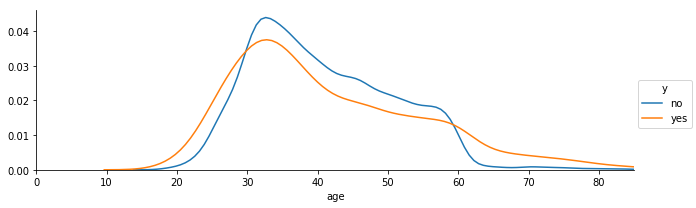

In [14]:
idade= sns.FacetGrid(dados, hue="y", aspect=3);
idade.map(sns.kdeplot, "age").add_legend();
idade.set(xlim=(0, 85));

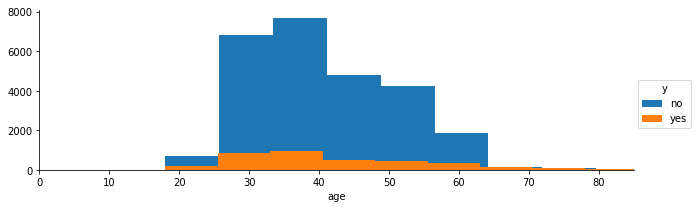

In [15]:
idade= sns.FacetGrid(dados, hue="y", aspect=3);
idade.map(plt.hist, "age").add_legend();
idade.set(xlim=(0, 85));

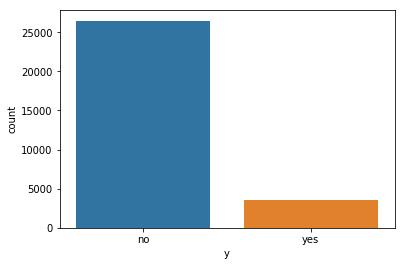

In [16]:
sns.countplot(dados['y'])

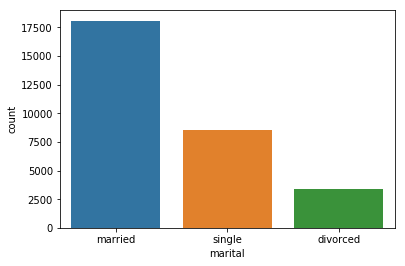

In [17]:
sns.countplot(dados['marital'])

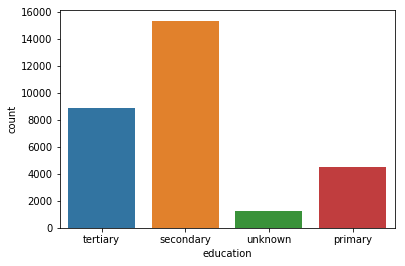

In [18]:
sns.countplot(dados['education'])

**Tratamento dos dados**

Porém para podermos utilizar os dados em algum algoritmo de aprendizado  precisamos que todos os valores sejam numericos, assim precisamos converter as colunas que são object.

Existem maneiras de fazermos isto com o sklearn ou com o pandas.
Vamos mostrar as duas:

- **Pandas:** Com o pandas convertemos a coluna para category, apos isto podemos fazer a função cat.codes. 
- **Sklearn:** Temos que utilizar a classe LabelEnconder, ela funciona como a classe de normalização.

In [19]:
education = dados['education']

In [20]:
education.head()

22805     tertiary
17710    secondary
44651      unknown
3862      tertiary
1971       primary
Name: education, dtype: object

In [21]:
#Pandas
#Convertendo os dados para categorico
educationConv = education.astype('category')

# pegando o valores de cada categoria
educationConv = educationConv.cat.codes
educationConv[:5]

22805    2
17710    1
44651    3
3862     2
1971     0
dtype: int8

In [22]:
education.head()

22805     tertiary
17710    secondary
44651      unknown
3862      tertiary
1971       primary
Name: education, dtype: object

In [23]:
#Sklearn
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
educationConv2 = label.fit_transform(education)
educationConv2[:5]

array([2, 1, 3, 2, 0], dtype=int64)

Agora vamos usar um loop para podermos fazer a conversão de todos os dados do dataframe 

In [24]:
for coluna in dados:
    if dados[coluna].dtype == object:
        dados[coluna] = dados[coluna].astype('category').cat.codes

Nota-se como o dataframe ficou após a conversão dos **dados** !

In [25]:
dados.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
22805,60,4,1,2,1,-311,0,0,0,25,1,151,6,-1,0,3,0
17710,25,7,2,1,0,88,1,0,0,29,5,121,18,-1,0,3,0
44651,48,11,2,3,0,1819,0,0,0,2,11,1440,1,458,1,0,1
3862,29,10,2,2,0,0,1,1,2,16,8,703,4,-1,0,3,0
1971,50,1,0,0,0,31,1,0,2,9,8,237,3,-1,0,3,0


**Separando dados**

Com os dados convertidos vamos separa X e y, e em treino e teste.

In [26]:
dadosY1 = dados[dados['y']== 1]
dadosY2 = dados[dados['y']== 0]

In [27]:
dadosY2 = dadosY2.sample(len(dadosY1))

In [28]:
dados2 = pd.concat([dadosY1,dadosY2])

Apaga-se a coluna **y** (coluna alvo)

In [29]:
y = dados.y
x = dados.drop('y',axis=1) 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#Optamos por destinar 30% dos dados para treino
np.random.seed(100)
xTreino,xTeste,yTreino,yTeste = train_test_split(x,y, test_size=0.3)

### Utilizando árvore de descisão

Agora vamos criar um modelo de descisão como a arvoré de descisão

![logos](https://camo.githubusercontent.com/48f1f5cd2785d7bba6324355c0e5e1de2bfa82d5/68747470733a2f2f696d6167652e6962622e636f2f634d6157677a2f53637265656e73686f745f66726f6d5f323031385f31305f30365f30315f31305f35332e706e67)

In [32]:
from sklearn.tree import DecisionTreeClassifier

**Entropia** é a medida de impureza de determinada amostra e varia de 0 a 1. Quanto mais próxima de zero, mais pura é a amostra, ou seja, contém elementos de apenas uma determinada classe. Se todos os exemplos fossem perfeitamente divididos entre as classes disponíveis, a entropia teria o seu maio valor possível, que é 1. <p>A fórmula matemática de entropia é a seguinte:

Entropia (S) = ⅀ – pi * log2 pi

In [33]:
#Criando modelo de classificação
tree = DecisionTreeClassifier(criterion='entropy',max_depth=2)

#Treinando modelo
tree.fit(xTreino,yTreino)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
#Predizendo dados 
preditos = tree.predict(xTeste)

#Verificando modelo
from sklearn.metrics import classification_report
print(classification_report(preditos,yTeste))

             precision    recall  f1-score   support

          0       1.00      0.88      0.94      9000
          1       0.00      0.00      0.00         0

avg / total       1.00      0.88      0.94      9000



In [35]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

confusion_matrix(preditos, yTeste)

array([[7910, 1090],
       [   0,    0]], dtype=int64)

In [36]:
preditos = tree.predict_proba(xTeste)
preditos

array([[0.76557482, 0.23442518],
       [0.9580992 , 0.0419008 ],
       [0.9580992 , 0.0419008 ],
       ...,
       [0.9580992 , 0.0419008 ],
       [0.9580992 , 0.0419008 ],
       [0.9580992 , 0.0419008 ]])

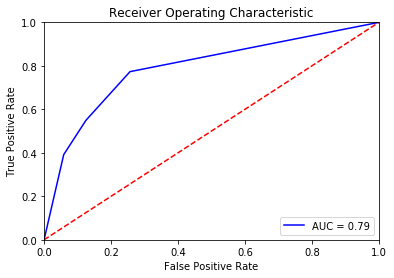

In [37]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = tree.predict_proba(xTeste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yTeste, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
print ("\nAcurácia de classificação = "+str(100*roc_auc)+"%\n")


Acurácia de classificação = 78.8889281944815%



![logos](https://cdn4.iconfinder.com/data/icons/robotics-and-artificial-intelligence/512/2-512.png)

Agora abordaremos a 2ª parte do conjunto de dados separada lá no começo<p>
    Chamamos de "**df**"<p>
        Realizaremos todo o tratamento de dados novamente para os mesmos<p>
            Porém antes realizaremos uma análise dos dados

In [39]:
df.shape

(25211, 17)

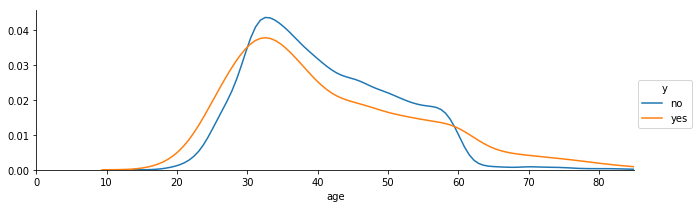

In [40]:
idade= sns.FacetGrid(df, hue="y", aspect=3);
idade.map(sns.kdeplot, "age").add_legend();
idade.set(xlim=(0, 85));

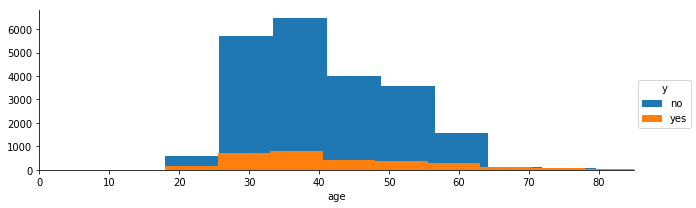

In [41]:
idade= sns.FacetGrid(df, hue="y", aspect=3);
idade.map(plt.hist, "age").add_legend();
idade.set(xlim=(0, 85));

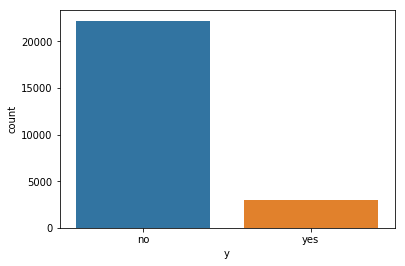

In [42]:
sns.countplot(df['y'])

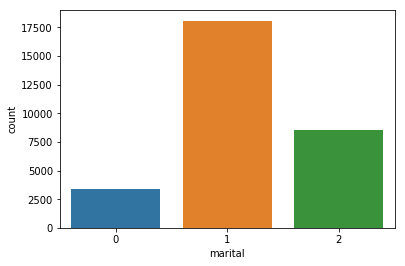

In [43]:
sns.countplot(dados['marital'])

**Tratamento dos Dados**

In [44]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7169,37,blue-collar,married,secondary,no,11953,yes,yes,unknown,29,may,208,1,-1,0,unknown,no
37997,34,blue-collar,married,secondary,no,259,yes,no,cellular,14,may,291,2,-1,0,unknown,no
13261,52,technician,married,secondary,yes,0,no,no,cellular,8,jul,584,2,-1,0,unknown,no
37465,46,services,divorced,secondary,no,2268,yes,no,cellular,13,may,281,3,-1,0,unknown,no
34580,31,management,single,tertiary,no,130,yes,no,cellular,5,may,155,1,-1,0,unknown,no


In [45]:
education = df['education']

In [46]:
education.head()

7169     secondary
37997    secondary
13261    secondary
37465    secondary
34580     tertiary
Name: education, dtype: object

In [47]:
#dessa vez usaremos somente o Sklearn
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
educationConv2 = label.fit_transform(education)
educationConv2[:5]

array([1, 1, 1, 1, 2], dtype=int64)

Agora vamos usar um loop para podermos fazer a conversão de todos os dados do dataframe 

In [48]:
for coluna in df:
    if df[coluna].dtype == object:
        df[coluna] = df[coluna].astype('category').cat.codes

Nota-se como o dataframe ficou após a conversão dos **dados** !

In [49]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7169,37,1,1,1,0,11953,1,1,2,29,8,208,1,-1,0,3,0
37997,34,1,1,1,0,259,1,0,0,14,8,291,2,-1,0,3,0
13261,52,9,1,1,1,0,0,0,0,8,5,584,2,-1,0,3,0
37465,46,7,0,1,0,2268,1,0,0,13,8,281,3,-1,0,3,0
34580,31,4,2,2,0,130,1,0,0,5,8,155,1,-1,0,3,0


In [50]:
xx = df.drop('y',axis=1) 

In [51]:
xx.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
7169,37,1,1,1,0,11953,1,1,2,29,8,208,1,-1,0,3
37997,34,1,1,1,0,259,1,0,0,14,8,291,2,-1,0,3
13261,52,9,1,1,1,0,0,0,0,8,5,584,2,-1,0,3
37465,46,7,0,1,0,2268,1,0,0,13,8,281,3,-1,0,3
34580,31,4,2,2,0,130,1,0,0,5,8,155,1,-1,0,3


In [52]:
#Predizendo dados 
preditos = tree.predict(xx)
perc_resp = tree.predict_proba(xx)

In [53]:
preditos

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [54]:
perc_resp[:,0] #todas as linhas da 1ª coluna

array([0.9580992 , 0.9580992 , 0.52071006, ..., 0.9580992 , 0.9580992 ,
       0.9580992 ])

In [55]:
perc_resp[:,1] #todas as linhas da 2ª coluna

array([0.0419008 , 0.0419008 , 0.47928994, ..., 0.0419008 , 0.0419008 ,
       0.0419008 ])

In [56]:
xx['resp']=preditos

In [57]:
xx['perc_resp1'] =perc_resp[:,0]

In [58]:
xx['perc_resp2'] = perc_resp[:,1] 

In [59]:
xx.head(100)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,resp,perc_resp1,perc_resp2
7169,37,1,1,1,0,11953,1,1,2,29,8,208,1,-1,0,3,0,0.958099,0.041901
37997,34,1,1,1,0,259,1,0,0,14,8,291,2,-1,0,3,0,0.958099,0.041901
13261,52,9,1,1,1,0,0,0,0,8,5,584,2,-1,0,3,0,0.520710,0.479290
37465,46,7,0,1,0,2268,1,0,0,13,8,281,3,-1,0,3,0,0.958099,0.041901
34580,31,4,2,2,0,130,1,0,0,5,8,155,1,-1,0,3,0,0.958099,0.041901
41629,49,6,1,2,0,1791,0,0,0,25,11,139,1,-1,0,3,0,0.958099,0.041901
615,39,4,1,2,0,2877,1,0,2,6,8,278,1,-1,0,3,0,0.958099,0.041901
37314,32,1,1,1,0,-64,1,0,0,13,8,641,1,-1,0,3,0,0.520710,0.479290
34230,52,10,1,1,0,94,0,0,0,4,8,223,9,4,1,2,0,0.958099,0.041901
27764,27,9,2,2,0,3064,0,1,0,28,4,389,1,-1,0,3,0,0.958099,0.041901
